## Group Project - BCIS 5110 Programming Languages for Business Analytics

**Group 2:** Sarah McCoy, Kavya Kumary Jayanthi Nair, Harshawardhan Baban Borude

**Project Description:**
In this project, We will be working the the retail store dataset which we downloaded from "Kaggle". The dataset contains 20,000 rows and 19 columns, each row representing a unique purchase made by a customer. The columns in the dataset are as follows:

CustomerID: A unique identifier for each customer.
<br>Age: The age of the customer.
<br>Gender: The gender of the customer.
<br>AnnualIncome: The annual income of the customer in USD.
<br>SpendingScore: A score (out of 100) that indicates the customer's spending behavior.
<br>ProductCategory: The category of the product that the customer bought.
<br>ProductPrice: The price of the product that the customer bought in USD.
<br>PurchaseDate: The date when the customer bought the product.
<br>StoreID: The ID of the store where the purchase was made.
<br>StoreLocation: The location of the store.
<br>PaymentMethod: The payment method used by the customer.
<br>DiscountApplied: Whether a discount was applied to the purchase (True or False).
<br>DiscountPercent: The percentage of discount applied to the purchase.
<br>ProductCost: The cost of the product to the retailer in USD.
<br>Profit: The profit made by the retailer on the sale in USD.
<br>FootTraffic: The number of people that visited the store on the day of the purchase.
<br>InventoryLevel: The inventory level of the product at the time of the purchase.
<br>MarketingExpenditure: The amount of money spent on marketing the product in USD.
<br>CompetitorPrice: The price of the same


Initially there were no "Null" values avaiable in the dataset. We have generated the missing values in the dataset. We have used different Imputation techniques to Impute the "Null" values. Once Data preprocessing is completed, we have come up with different analysis questions related and answered those questions using different techniques we learned throughout this course.

In [1]:
# importing Pandas and Numpy Libraries
import pandas as pd
import numpy as np

# Convert the DataSet to a DataFrame
df = pd.read_csv("retail_data.csv")

/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/3280319144.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Check first five rows from the data to understand the data
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
0,1,58,Male,60038,41,Health & Beauty,147.43,2022-06-11,46,San Jose,Credit Card,True,26,109.10,38.33,336,26,9107.90,171.55
1,2,57,Male,31577,91,Health & Beauty,402.09,2023-06-05,53,Los Angeles,Mobile Payment,True,1,398.07,4.02,491,32,1746.77,419.19
2,3,39,Female,117404,26,Groceries,958.45,2020-10-14,95,Philadelphia,Mobile Payment,False,0,958.45,0.00,157,3,2030.49,835.92
3,4,33,Male,87434,94,Electronics,544.17,2021-08-27,24,Dallas,Credit Card,False,0,544.17,0.00,223,87,6242.68,620.36
4,5,18,Male,90225,10,Health & Beauty,645.75,2023-06-06,2,San Antonio,Credit Card,False,0,645.75,0.00,315,8,6008.89,600.49


In [3]:
# Check last five rows from the data to understand the volume data
df.tail()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
199995,199996,56,Male,21330,3,Groceries,859.79,2021-01-09,40,New York,Credit Card,True,25,644.84,214.95,57,20,308.08,1029.70
199996,199997,35,Female,100374,45,Clothing,409.98,2021-03-24,31,San Antonio,Cash,True,26,303.39,106.59,419,0,3224.83,414.27
199997,199998,49,Male,42793,73,Books,984.79,2021-07-01,83,San Jose,Cash,False,0,984.79,0.00,904,21,8068.57,891.04
199998,199999,67,Female,47549,81,Electronics,610.20,2022-07-23,81,Los Angeles,Cash,True,3,591.89,18.31,252,31,5903.46,551.02
199999,200000,51,Female,132210,84,Health & Beauty,183.05,2023-04-19,91,Phoenix,Debit Card,False,0,183.05,0.00,459,64,8774.36,162.62


In [4]:
# to print the shape of the Dataset
df.shape

(200000, 19)

In [5]:
# to get  the basic statistics results from the dataset
df.describe() 

,CustomerID,Age,AnnualIncome,SpendingScore,ProductPrice,StoreID,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000
mean,100000.500000,43.969475,85058.438785,50.417900,504.591928,50.418075,7.484810,466.868615,37.723312,524.944335,49.94360,5038.608535,504.746194
std,57735.171256,15.277401,37511.311914,28.864392,286.427125,28.835288,9.803708,271.084205,60.786853,274.168526,29.12104,2857.425697,294.172524
min,1.000000,18.000000,20001.000000,1.000000,10.000000,1.000000,0.000000,7.210000,0.000000,50.000000,0.00000,100.090000,8.120000
25%,50000.750000,31.000000,52577.000000,25.000000,255.730000,25.000000,0.000000,233.490000,0.000000,288.000000,25.00000,2568.380000,252.460000
50%,100000.500000,44.000000,85184.500000,50.000000,504.675000,50.000000,0.000000,461.105000,0.000000,524.000000,50.00000,5033.750000,498.025000
75%,150000.250000,57.000000,117460.250000,75.000000,752.740000,75.000000,15.000000,688.650000,55.832500,762.000000,75.00000,7508.137500,744.020000
max,200000.000000,70.000000,150000.000000,100.000000,1000.000000,100.000000,30.000000,1000.000000,299.870000,1000.000000,100.00000,9999.980000,1197.140000


In [6]:
# to set the "CustomerID" as index of the DataFrame
df = df.set_index(df['CustomerID'])

# to Drop  the "CustomerID" column from the DataFrame
df.drop(['CustomerID'], axis=1, inplace=True)


To Create the Null values in the DataFrame

In [7]:
np.random.seed(0) # setting seed as 0 to generate the same set of numbers as null percentage everytime
for i in range(len(df.columns)): # to interate over each columns from DataFrame
# Generate random number to decide the percentage of null values in your dataset (11% to 20%)
    null_percentage = np.random.randint(11,20)  # You can adjust this as needed
 
# Calculate the number of null values to create in particular column
    num_null_values = int(df['Age'].size * (null_percentage/100))

# Randomly select indices to assign null values
    null_indices = np.random.choice(df.index, size=num_null_values, replace=False)
 
# Assign null values to selected indices
    df.loc[null_indices,df.columns[i]] = np.nan

/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/1345368285.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[null_indices,df.columns[i]] = np.nan


Now, df contains null values randomly distributed across the DataFrame

## Part I: Data Imputation

In [8]:
# to check head of the DataFrame
df.head()

,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
CustomerID,,,,,,,,,,,,,,,,,,
1,58.0,Male,NaN,41.0,Health & Beauty,147.43,2022-06-11,46.0,San Jose,Credit Card,True,26.0,109.10,38.33,336.0,26.0,9107.90,NaN
2,57.0,Male,NaN,NaN,Health & Beauty,402.09,2023-06-05,53.0,Los Angeles,Mobile Payment,True,1.0,398.07,4.02,491.0,NaN,1746.77,419.19
3,39.0,Female,117404.0,26.0,Groceries,958.45,NaN,NaN,Philadelphia,NaN,False,0.0,958.45,0.00,157.0,NaN,2030.49,835.92
4,33.0,Male,NaN,NaN,Electronics,544.17,2021-08-27,24.0,Dallas,Credit Card,False,0.0,544.17,NaN,223.0,87.0,6242.68,620.36
5,18.0,Male,90225.0,10.0,NaN,645.75,2023-06-06,2.0,San Antonio,Credit Card,NaN,0.0,NaN,0.00,315.0,NaN,6008.89,600.49


In [9]:
#Calculating null values in DataFrame
null_values = (df.isnull().sum()).sum()

#Calculating the total non_null values in DataFrame
total_values = df.size

#percentage of null values in DataFrame
percentage = (null_values/total_values) * 100

#output
print(f"Percentage of'NaN' values in this DataSet is : {percentage.round(2):.2f}%")

Percentage of'NaN' values in this DataSet is : 14.78%


In [10]:
# to get  the basic statistics results from the dataset
df.describe() 

,Age,AnnualIncome,SpendingScore,ProductPrice,StoreID,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
count,168000.00000,172000.000000,162000.000000,170000.000000,170000.000000,174000.000000,170000.000000,178000.000000,166000.000000,162000.000000,174000.000000,174000.000000
mean,43.97219,85050.596349,50.411642,504.662759,50.458382,7.479086,467.233729,37.673312,524.965380,49.964994,5037.623119,504.293426
std,15.27819,37504.982194,28.856244,286.450408,28.853936,9.801776,270.960635,60.749203,273.979139,29.119870,2855.672988,294.050472
min,18.00000,20001.000000,1.000000,10.000000,1.000000,0.000000,7.210000,0.000000,50.000000,0.000000,100.090000,8.120000
25%,31.00000,52571.750000,25.000000,255.757500,25.000000,0.000000,233.877500,0.000000,287.750000,25.000000,2572.345000,252.170000
50%,44.00000,85120.500000,50.000000,504.850000,50.000000,0.000000,461.595000,0.000000,524.000000,50.000000,5032.450000,497.775000
75%,57.00000,117430.750000,75.000000,753.022500,75.000000,15.000000,688.980000,55.800000,762.000000,75.000000,7504.620000,743.150000
max,70.00000,150000.000000,100.000000,1000.000000,100.000000,30.000000,1000.000000,299.870000,1000.000000,100.000000,9999.980000,1196.960000


In [11]:
# to get the basic statistics about the categorical variables
df.describe(include = ['O'])

,Gender,ProductCategory,PurchaseDate,StoreLocation,PaymentMethod,DiscountApplied
count,176000,166000,168000,164000,176000,178000
unique,2,6,1096,10,5,2
top,Male,Books,2022-03-29,San Jose,Mobile Payment,False
freq,88007,27860,196,16509,35430,89099


In [12]:
# to check the rows with null values in Age column
df[df['Age'].isna()]

,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
CustomerID,,,,,,,,,,,,,,,,,,
6,NaN,Female,71051.0,74.0,Books,304.15,2022-02-05,93.0,San Diego,Debit Card,False,0.0,304.15,0.00,706.0,71.0,4022.86,NaN
13,NaN,Male,100528.0,65.0,Home & Kitchen,536.86,NaN,98.0,Phoenix,Mobile Payment,NaN,0.0,536.86,0.00,590.0,67.0,1289.48,487.57
15,NaN,Male,52343.0,NaN,NaN,870.01,2020-10-21,NaN,San Diego,Cash,False,NaN,870.01,0.00,NaN,2.0,NaN,1027.24
18,NaN,Male,95791.0,20.0,Home & Kitchen,NaN,2021-10-26,98.0,Dallas,Cash,False,0.0,46.38,0.00,834.0,57.0,5840.21,49.84
21,NaN,Male,35647.0,93.0,Health & Beauty,728.66,NaN,73.0,Philadelphia,Debit Card,True,3.0,706.80,21.86,763.0,NaN,9428.49,784.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199977,NaN,Male,NaN,63.0,Electronics,344.76,2022-07-23,63.0,San Diego,NaN,True,6.0,324.07,20.69,723.0,77.0,6616.45,281.19
199985,NaN,NaN,NaN,72.0,Home & Kitchen,486.02,2023-05-04,70.0,Philadelphia,Cash,True,13.0,422.84,NaN,535.0,NaN,6355.82,396.17
199989,NaN,Female,70497.0,45.0,Books,666.80,2022-06-25,39.0,New York,NaN,False,NaN,NaN,0.00,NaN,10.0,3856.76,571.03


In [13]:
#Impute the Age column
#Criteria : Check the mean of the age column and impute the missing values with the mean age

# Calculating the mean age from the avaible data and coverting it to int value
average_Age = df['Age'].mean().astype(int) 

# Iterting over the DataFrame to impute the missing values
for index_age, row_age in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isnull(row_age['Age']): # "if" condition to check for the null values in the Age column
        df.at[index_age, 'Age']  =  average_Age # imputing the null values found during iteration with the mean of the age


In [14]:
# to check the distrubution of the 'Gender' Column
df['Gender'].value_counts()

Gender
Male      88007
Female    87993
Name: count, dtype: int64

In [15]:
# to impute the missing values in the Gender column based on the  highest Frequency category.
#  in this case, we replaced that with Male
df.fillna({'Gender': 'Male'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          172000 non-null  float64
 3   SpendingScore         162000 non-null  float64
 4   ProductCategory       166000 non-null  object 
 5   ProductPrice          170000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               170000 non-null  float64
 8   StoreLocation         164000 non-null  object 
 9   PaymentMethod         176000 non-null  object 
 10  DiscountApplied       178000 non-null  object 
 11  DiscountPercent       174000 non-null  float64
 12  ProductCost           170000 non-null  float64
 13  Profit                178000 non-null  float64
 14  FootTraffic           166000 non-null  float64
 15  Inven

In [16]:
# to check the count of the unique store IDs for each store location
mean_value = df.groupby('StoreID')['StoreLocation'].unique().count()
# print the count of store ID
print(f'Count of Store IDs: {mean_value}')
print() # additional print for adding new line

# to check the unique store IDs
unique_store_ids_nan = np.sort(df['StoreID'].unique())
# print the array of unique store ID including NaN value
print(f'Unique Store IDs with Null Values: {unique_store_ids_nan}') 
print() # additional print for adding new line

# to remove the NaN values from unique store ID array
# to get the Boolean values for NaN and Non-NaN store ID values
not_nan = ~np.isnan(unique_store_ids_nan)
#to get the store IDs exlusding the NaN values
unique_store_ids = unique_store_ids_nan[not_nan]
# print the array of store IDs without NaN value
print(f'Unique Store IDs without Null Values: {unique_store_ids}')
print() # additional print for adding new line

Count of Store IDs: 100

Unique Store IDs with Null Values: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.  nan]

Unique Store IDs without Null Values: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  

In [17]:
np.random.seed(0) # setting seed as 0 to generate the same set of numbers as null percentage everytime
# Iterting over the DataFrame to impute the missing values in Store ID column
for index_storeID, row_storeID in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isna(row_storeID["StoreID"]):  # "if" condition to check for the null values in the Store ID column
        df.loc[index_storeID, "StoreID"] = np.random.randint(1,len(unique_store_ids)) # imputing the null values found during iteration with the random Store ID picked from above Unique store array 


In [18]:
df['StoreID'].value_counts()

StoreID
46.0     2122
54.0     2099
31.0     2094
65.0     2071
59.0     2065
         ... 
64.0     1923
68.0     1906
97.0     1903
60.0     1895
100.0    1743
Name: count, Length: 100, dtype: int64

In [19]:
# to get the Unique Store Locations into array
array_StoreLocation = df['StoreLocation'].dropna().unique()
array_StoreLocation

array(['San Jose', 'Los Angeles', 'Philadelphia', 'Dallas', 'San Antonio',
       'San Diego', 'Phoenix', 'Houston', 'Chicago', 'New York'],
      dtype=object)

In [20]:
np.random.randint(0,len(array_StoreLocation))

6

In [21]:
np.random.seed(0) # setting seed as 0 to generate the same set of numbers as null percentage everytime

# Iterting over the DataFrame to impute the missing values in StoreLocation column
for index_store_location, row_store_location in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isna(row_store_location["StoreLocation"]):  # "if" condition to check for the null values in the StoreLocation column
        df.loc[index_store_location, "StoreLocation"] = array_StoreLocation[np.random.randint(0,len(array_StoreLocation))] # imputing the null values found during iteration with the random StoreLocation picked from above array 


In [22]:
df['StoreLocation'].value_counts()

StoreLocation
San Antonio     20066
Phoenix         20054
San Diego       20039
San Jose        20033
Los Angeles     20031
Dallas          20006
Chicago         19998
New York        19995
Philadelphia    19890
Houston         19888
Name: count, dtype: int64

In [23]:
# to check the disctibution of the Product Category
# to check the count of records in each Product Category
df['ProductCategory'].value_counts()

ProductCategory
Books              27860
Groceries          27688
Electronics        27664
Clothing           27655
Home & Kitchen     27587
Health & Beauty    27546
Name: count, dtype: int64

In [24]:
# to get the Unique Store Locations into array
array_ProductCategory = df['ProductCategory'].dropna().unique()

In [25]:
np.random.seed(0) # setting seed as 0 to generate the same set of numbers as null percentage everytime

# Iterting over the DataFrame to impute the missing values in ProductCategorycolumn
for index_ProdCat, row_ProdCat in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isna(row_ProdCat["ProductCategory"]):  # "if" condition to check for the null values in the ProductCategory column
        df.loc[index_ProdCat, "ProductCategory"] = array_ProductCategory[np.random.randint(0,len(array_ProductCategory))] # imputing the null values found during iteration with the random ProductCategory picked from above array 


In [26]:
df['ProductCategory'].value_counts()

ProductCategory
Books              33567
Clothing           33381
Groceries          33319
Electronics        33306
Home & Kitchen     33285
Health & Beauty    33142
Name: count, dtype: int64

In [27]:
# Iterate over each row in the DataFrame using iterrows() function
for index_disc, row_disc in df.iterrows():
    # Case 1: If 'DiscountApplied' is null and one of the following conditions is met:
    # - 'DiscountPercent' is 0
    # - 'ProductPrice' equals 'ProductCost'
    # - 'Profit' is 0
    # Then, set 'DiscountApplied' to False
    if pd.isna(row_disc["DiscountApplied"]) and (row_disc['DiscountPercent'] == 0 or 
                                                  row_disc['ProductPrice'] == row_disc['ProductCost'] or 
                                                  row_disc['Profit'] == 0):
        df.at[index_disc,'DiscountApplied'] = False
        
    # Case 2: If 'DiscountApplied' is null and one of the following conditions is met:
    # - 'DiscountPercent' is greater than 0
    # - 'ProductPrice' is not equal to 'ProductCost'
    # - 'Profit' is greater than 0
    # Then, set 'DiscountApplied' to True
    elif pd.isna(row_disc["DiscountApplied"]) and (row_disc['DiscountPercent'] > 0 or 
                                                    row_disc['ProductPrice'] != row_disc['ProductCost'] or 
                                                    row_disc['Profit'] > 0):
        df.at[index_disc,'DiscountApplied'] = True
    

# df.fillna({'DiscountApplied': False}, inplace = True)
# df.info()
df[df['DiscountApplied'].isna()]

,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
CustomerID,,,,,,,,,,,,,,,,,,


In [28]:
# Iterate over each row in the DataFrame using iterrows() function
for index_Disc, row_Disc in df.iterrows():
    # Case 1: If 'DiscountPercent' is null and one of the following conditions is met:
    # - 'DiscountApplied' is False
    # - 'ProductPrice' equals 'ProductCost'
    # - 'Profit' is 0
    # Then, set 'DiscountPercent' to 0
    if pd.isna(row_Disc["DiscountPercent"]) and (row_Disc['DiscountApplied'] == False or 
                                                 row_Disc['ProductPrice'] == row_Disc['ProductCost'] or 
                                                 row_Disc['Profit'] == 0):
        df.at[index_Disc,'DiscountPercent'] = 0
        
    # Case 2: If 'DiscountPercent' is null and 'DiscountApplied' is True, 
    # 'ProductPrice' is greater than 0, 'ProductCost' is greater than 0, 
    # and 'ProductPrice' is greater than 'ProductCost'
    # Calculate discount percentage and set 'DiscountPercent' accordingly
    elif pd.isna(row_Disc["DiscountPercent"]) and (row_Disc['DiscountApplied'] == True and 
                                                   row_Disc['ProductPrice'] > 0 and 
                                                   row_Disc['ProductCost'] > 0 and 
                                                   row_Disc['ProductPrice'] > row_Disc['ProductCost']):
        df.at[index_Disc,'DiscountPercent'] = round(((row_Disc['ProductPrice'] - row_Disc['ProductCost']) * 100) / row_Disc['ProductPrice'])
        
    # Case 3: If 'DiscountPercent' is null and 'DiscountApplied' is True, 
    # 'ProductCost' is greater than 0, 'ProductPrice' is null, 
    # and 'Profit' is greater than 0
    # Calculate discount percentage based on target price and set 'DiscountPercent' accordingly
    elif pd.isna(row_Disc["DiscountPercent"]) and (row_Disc['DiscountApplied'] == True and 
                                                   row_Disc['ProductCost'] > 0 and
                                                   pd.isnull(row_Disc['ProductPrice']) and 
                                                   row_Disc['Profit'] > 0):
        target_price = row_Disc['ProductCost'] + row_Disc['Profit']
        df.at[index_Disc,'DiscountPercent'] = round(((target_price - row_Disc['ProductCost']) * 100) / target_price)
        
    # Case 4: If 'DiscountPercent' is null and 'DiscountApplied' is True, 
    # 'ProductPrice' is greater than 0, 'ProductCost' is null, 
    # and 'Profit' is greater than 0
    # Calculate discount percentage based on target cost and set 'DiscountPercent' accordingly
    elif pd.isna(row_Disc["DiscountPercent"]) and (row_Disc['DiscountApplied'] == True and 
                                                   row_Disc['ProductPrice'] > 0 and 
                                                   pd.isnull(row_Disc['ProductCost']) and 
                                                   row_Disc['Profit'] > 0):
        target_cost = row_Disc['ProductPrice'] - row_Disc['Profit']
        df.at[index_Disc,'DiscountPercent'] = round(((row_Disc['ProductPrice'] - target_cost) * 100) / row_Disc['ProductPrice'])
        
    # Case 5: If 'DiscountPercent' is still null after checking all conditions,
    # set 'DiscountPercent' to 10 as default
    elif pd.isna(row_Disc["DiscountPercent"]):
        df.at[index_Disc,'DiscountPercent'] = 10

In [29]:
df[df['ProductPrice'].isna()]

,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
CustomerID,,,,,,,,,,,,,,,,,,
7,18.0,Male,116056.0,77.0,Health & Beauty,NaN,2023-05-30,83.0,San Jose,Cash,False,0.0,629.44,0.00,796.0,82.0,9973.90,614.19
8,19.0,Male,116897.0,7.0,Clothing,NaN,2022-12-16,61.0,Los Angeles,Cash,False,0.0,57.43,0.00,642.0,28.0,1940.60,62.94
18,43.0,Male,95791.0,20.0,Home & Kitchen,NaN,2021-10-26,98.0,Dallas,Cash,False,0.0,46.38,0.00,834.0,57.0,5840.21,49.84
20,55.0,Male,23490.0,41.0,Books,NaN,2021-09-25,93.0,Houston,Online Transfer,False,0.0,991.35,0.00,917.0,96.0,4036.84,1029.38
25,67.0,Female,42708.0,32.0,Home & Kitchen,NaN,2021-03-31,66.0,San Diego,Cash,False,0.0,321.59,NaN,NaN,61.0,9572.98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199966,64.0,Female,NaN,52.0,Groceries,NaN,2022-08-20,9.0,Houston,Mobile Payment,True,5.0,685.01,36.05,695.0,NaN,NaN,598.76
199983,32.0,Female,80146.0,27.0,Electronics,NaN,2022-05-29,92.0,Phoenix,Mobile Payment,False,0.0,491.93,NaN,880.0,NaN,9384.63,NaN
199986,23.0,Male,127142.0,91.0,Clothing,NaN,2022-06-04,20.0,San Antonio,Debit Card,False,0.0,648.72,NaN,853.0,24.0,8159.55,563.10


In [30]:
 pd.isnull(row_Disc['ProductCost'])

False

In [31]:
df.at[25,'ProductPrice']

nan

In [32]:
pd.isnull(df.loc[25,'ProductPrice'])

True

In [33]:
df.at[25,'ProductPrice'] < 0

False

In [34]:
~(df.at[25,'ProductPrice'] < 0)

True

In [35]:
(df.at[25,'ProductPrice'] != 0)

True

In [36]:
dict_category = dict(df.groupby('ProductCategory')['ProductCost'].mean().round(2))
dict_category

{'Books': 466.05,
 'Clothing': 468.11,
 'Electronics': 467.09,
 'Groceries': 466.94,
 'Health & Beauty': 465.79,
 'Home & Kitchen': 469.42}

In [37]:

# Iterate over each row in the DataFrame using iterrows() function
for index_cost, row_cost in df.iterrows():
    # Check if 'ProductCost' is null for the current row
    if (pd.isnull(row_cost['ProductCost'])):
        # Case 1: If 'ProductPrice' is not null and 'DiscountPercent' is 0,
        # set 'ProductCost' equal to 'ProductPrice'
        if pd.notnull(row_cost['ProductPrice']) and row_cost['DiscountPercent'] == 0:
            df.at[index_cost, 'ProductCost'] = row_cost['ProductPrice']
        # Case 2: If 'ProductPrice' is not null and 'DiscountPercent' is greater than 0,
        # calculate cost after discount and set 'ProductCost' accordingly
        elif pd.notnull(row_cost['ProductPrice']) and row_cost['DiscountPercent'] > 0:
            cost = row_cost['ProductPrice'] - (row_cost['ProductPrice'] * row_cost['DiscountPercent'] / 100)
            df.at[index_cost, 'ProductCost'] = cost
        # Case 3: If 'ProductPrice' is null, profit is greater than 0, and 'DiscountPercent' is greater than 0,
        # calculate cost based on profit and discount percentage and set 'ProductCost' accordingly
        elif pd.isnull(row_cost['ProductPrice']) and row_cost['Profit'] > 0 and row_cost['DiscountPercent'] > 0:
            cost = (row_cost['Profit'] / row_cost['DiscountPercent']) * 100 - row_cost['Profit']
            df.at[index_cost, 'ProductCost'] = cost
        # Case 4: If 'ProductPrice' is null, and none of the above conditions are met,
        # set 'ProductCost' based on the 'ProductCategory' from 'dict_category' above
        elif pd.isnull(row_cost['ProductPrice']):
            for (key_cat, value_cat) in dict_category.items():
                if str(row_cost['ProductCategory']) == key_cat:
                    df.at[index_cost, 'ProductCost'] = value_cat

# Output the rows where 'ProductCost' is still null
df[df['ProductCost'].isna()]

,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
CustomerID,,,,,,,,,,,,,,,,,,


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          172000 non-null  float64
 3   SpendingScore         162000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          170000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         176000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                178000 non-null  float64
 14  FootTraffic           166000 non-null  float64
 15  Inven

In [39]:
# Iterting over the DataFrame to impute the missing values in "ProductPrice" column

for index_price, row_price in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if (pd.isnull(row_price['ProductPrice'])): # "if" condition to check for the null values in the "ProductPrice" column
        if row_price['DiscountPercent'] == 0: # "if" condition to check the Discount percent is Zero
            df.at[index_price,'ProductPrice'] = row_price['ProductCost'] #imputing the null values found during iteration with the "Product Cost" as Discount is zero
        elif row_price['DiscountPercent'] > 0:# "else if" condition to check the if Discount percent is greater than 0
            price = (100 * row_price['ProductCost'])/ (100 - row_price['DiscountPercent']) # calculating the price based on the discount parcentage avaiable in that row
            df.at[index_price,'ProductPrice'] = price #imputing the null values found during iteration with the Price calculated in above step
        

In [40]:
# to check if imputation filled all the values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          172000 non-null  float64
 3   SpendingScore         162000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         176000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                178000 non-null  float64
 14  FootTraffic           166000 non-null  float64
 15  Inven

In [41]:

# Iterting over the DataFrame to impute the missing values in "Profit" column
for index_profit, row_profit in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if (pd.isnull(row_profit['Profit'])): # "if" condition to check for the null values in the "Profit" column
         df.at[index_profit,'Profit'] = df.at[index_profit,'ProductPrice'] - df.at[index_profit,'ProductCost'] # imputing the null values found during iteration with the calculated profit(Price - Cost) 

In [42]:
#to check if imputation filled all the values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          172000 non-null  float64
 3   SpendingScore         162000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         176000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           166000 non-null  float64
 15  Inven

In [43]:
np.random.seed(0) # setting seed as 0 to generate the same set of numbers as null percentage everytime

# to get the unique Payment Methods wihout null values
list_PaymentMethod = list(df['PaymentMethod'].dropna().unique())


# Iterting over the DataFrame to impute the missing values in PaymentMethod column
for index_PayMeth, row_PayMeth in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isna(row_PayMeth["PaymentMethod"]):  # "if" condition to check for the null values in the ProductCategory column
        df.loc[index_PayMeth, "PaymentMethod"] = list_PaymentMethod[np.random.randint(0,len(list_PaymentMethod))] # imputing the null values found during iteration with the random ProductCategory picked from above array 



In [44]:
# to calculate the average Annual Income based on Each Payment Method
dict_payMethod = df.groupby('PaymentMethod')['AnnualIncome'].median().astype(int)
dict_payMethod

PaymentMethod
Cash               85440
Credit Card        85105
Debit Card         85616
Mobile Payment     85139
Online Transfer    84201
Name: AnnualIncome, dtype: int64

In [45]:
df['PaymentMethod'].value_counts()

PaymentMethod
Mobile Payment     40229
Debit Card         40097
Credit Card        40018
Online Transfer    39847
Cash               39809
Name: count, dtype: int64

In [46]:
# Iterting over the DataFrame to impute the missing values in "Annual Income" column
for index_pay, row_pay in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if (pd.isnull(row_pay['AnnualIncome'])): #to iterate to only blank in age columns
        for (key_payMethod, value_payMethod) in dict_payMethod.items(): # iterate over grouped_values dictionary
            if str(row_pay['PaymentMethod']) == key_payMethod: # to compare Payment Method value with dictionary key
                df.at[index_pay,'AnnualIncome'] = value_payMethod # imputing the null values found during iteration correspodning values from the Dictionary 

In [47]:
#to check if imputation filled all the values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          200000 non-null  float64
 3   SpendingScore         162000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         200000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           166000 non-null  float64
 15  Inven

In [48]:
# to calculate the average Inventory Level for each storeID from each location
dict_Inv = df.groupby(['StoreID','StoreLocation'])['InventoryLevel'].median().astype(int)
dict_Inv

StoreID  StoreLocation
1.0      Chicago          55
         Dallas           54
         Houston          51
         Los Angeles      41
         New York         53
                          ..
100.0    Philadelphia     52
         Phoenix          57
         San Antonio      51
         San Diego        60
         San Jose         50
Name: InventoryLevel, Length: 1000, dtype: int64

In [49]:
# check before Imputation
dict_Inv[100]['Chicago']

44

In [50]:
# Iterting over the DataFrame to impute the missing values in "Inventory Level" column
for index_inv, row_inv in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isna(row_inv["InventoryLevel"]): # "if" condition to check for the null values in the "Inventory Level" column
        df.at[index_inv,'InventoryLevel'] = dict_Inv[row_inv['StoreID']][row_inv['StoreLocation']] # imputing the null values found during iteration with values from the dictinaty genereated above

In [51]:
#to check if imputation filled all the values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          200000 non-null  float64
 3   SpendingScore         162000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         200000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           166000 non-null  float64
 15  Inven

In [52]:
# Calculating the mean spending score
mean_spending = int(df['SpendingScore'].mean())
print(mean_spending)

#imputing the missing values in the spending score with the mean spending score
df['SpendingScore'].fillna(mean_spending, inplace=True)

50


/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/2668145109.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SpendingScore'].fillna(mean_spending, inplace=True)


In [53]:
#to check if imputation filled all the values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          200000 non-null  float64
 3   SpendingScore         200000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         200000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           166000 non-null  float64
 15  Inven

In [54]:
# to calculate the average Foot Traffic for each storeID from each location
dict_FT = df.groupby(['StoreID','StoreLocation'])['FootTraffic'].median().astype(int)
dict_FT

# dict_FT = df.groupby('StoreID')['FootTraffic'].median().astype(int)
# dict_FT

StoreID  StoreLocation
1.0      Chicago          505
         Dallas           553
         Houston          475
         Los Angeles      532
         New York         576
                         ... 
100.0    Philadelphia     566
         Phoenix          535
         San Antonio      518
         San Diego        484
         San Jose         574
Name: FootTraffic, Length: 1000, dtype: int64

In [55]:
# Iterting over the DataFrame to impute the missing values in "Foot Traffic" column
for index_FT, row_FT in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isna(row_FT["FootTraffic"]): # "if" condition to check for the null values in the "Foot Traffic" column
        df.at[index_FT,'FootTraffic'] = dict_FT[row_FT['StoreID']][row_FT['StoreLocation']]# imputing the null values found during iteration with values from the dictinaty genereated above

# for index_FT, row_FT in df.iterrows():
#     if pd.isna(row_FT["FootTraffic"]):
#         df.at[index_FT,'FootTraffic'] = dict_FT[row_FT['StoreID']]

In [56]:
#to check if imputation filled all the values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          200000 non-null  float64
 3   SpendingScore         200000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         200000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           200000 non-null  float64
 15  Inven

In [57]:
# Calculating the mean Marketing Expenditure
mean_MarkExpe = df['MarketingExpenditure'].mean().round(2)
print(mean_MarkExpe)

#Imputing the missing values in the spending score with the mean Marketing Expenditure
df['MarketingExpenditure'].fillna(mean_MarkExpe, inplace=True)

5037.62


/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/1156359183.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MarketingExpenditure'].fillna(mean_MarkExpe, inplace=True)


In [58]:
#to check if imputation filled all the values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          200000 non-null  float64
 3   SpendingScore         200000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         200000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           200000 non-null  float64
 15  Inven

In [59]:
# to calculate the average CompetitorPrice based on each storeID and ProductCategory
dict_comp_price_category = df.groupby(['StoreID','ProductCategory'])['CompetitorPrice'].median().round(2)
dict_comp_price_category

StoreID  ProductCategory
1.0      Books              452.82
         Clothing           493.89
         Electronics        474.04
         Groceries          524.90
         Health & Beauty    522.76
                             ...  
100.0    Clothing           505.50
         Electronics        485.13
         Groceries          479.48
         Health & Beauty    483.66
         Home & Kitchen     531.26
Name: CompetitorPrice, Length: 600, dtype: float64

In [60]:

# Iterting over the DataFrame to impute the missing values in "CompetitorPrice" column
for index_CompPrice, row_CompPrice in df.iterrows(): # "for" loop over a DataFrame to get the index and row from the datafrome
    if pd.isna(row_CompPrice["CompetitorPrice"]): # "if" condition to check for the null values in the "Competitor Price" column
        df.at[index_CompPrice,'CompetitorPrice'] = dict_comp_price_category[row_CompPrice['StoreID']][row_CompPrice['ProductCategory']]# imputing the null values found during iteration with values from the dictinaty genereated above


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          200000 non-null  float64
 3   SpendingScore         200000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          168000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         200000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           200000 non-null  float64
 15  Inven

In [62]:
df.to_csv("final_retail_data.csv")

In [63]:
round(26.19999) 

26

In [64]:
# Forward fill for missing purchase dates
df['PurchaseDate'] = df['PurchaseDate'].ffill()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 1 to 200000
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   200000 non-null  float64
 1   Gender                200000 non-null  object 
 2   AnnualIncome          200000 non-null  float64
 3   SpendingScore         200000 non-null  float64
 4   ProductCategory       200000 non-null  object 
 5   ProductPrice          200000 non-null  float64
 6   PurchaseDate          200000 non-null  object 
 7   StoreID               200000 non-null  float64
 8   StoreLocation         200000 non-null  object 
 9   PaymentMethod         200000 non-null  object 
 10  DiscountApplied       200000 non-null  object 
 11  DiscountPercent       200000 non-null  float64
 12  ProductCost           200000 non-null  float64
 13  Profit                200000 non-null  float64
 14  FootTraffic           200000 non-null  float64
 15  Inven

In [66]:
#Based on Location and store ID, calculated the profit and inventory level
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'SpendingScore', 'ProductCategory',
       'ProductPrice', 'PurchaseDate', 'StoreID', 'StoreLocation',
       'PaymentMethod', 'DiscountApplied', 'DiscountPercent', 'ProductCost',
       'Profit', 'FootTraffic', 'InventoryLevel', 'MarketingExpenditure',
       'CompetitorPrice'],
      dtype='object')

## Part II: Analysis - Research Questions

**Question 1:**
Calculate the profit or Inventory Level, provided the store ID, Store Location from the dataset.
Write a function to get the desired Profit or Inventory value.

In [67]:
def calculate_metric(store_id, location, dataset, metric):
    # Filter dataset based on store ID and location
    filtered_data = dataset[(dataset['StoreID'] == store_id) & (dataset['StoreLocation'] == location)]
    
    if metric == 'profit':
        # Calculate total profit
        total_metric = filtered_data['Profit'].sum().round(2)
    elif metric == 'inventory':
        # Calculate total inventory level
        total_metric = filtered_data['InventoryLevel'].sum().round(2)
    else:
        return "Invalid metric. Please choose 'profit' or 'inventory'."
    
    return total_metric

**Function Explanation:**
The calculate_metric function is designed to compute a specific metric (either profit or inventory) for a given store and location from a provided dataset.


**Parameters:**
store_id: This parameter represents the unique identifier of the store for which the metric is calculated.
Location: This parameter denotes the location of the store.
Dataset: This parameter contains information about various stores, including their profits and inventory levels.
Metric: This parameter specifies the metric to be calculated, which can either be 'profit' or 'inventory.'


**Approach:**
Data Filtering: The function starts by filtering the dataset based on the provided store_id and location. This step ensures that only the data relevant to the specified store and location is considered for the calculation.


**Metric Calculation:**
If the requested metric is 'profit,' the function calculates the total profit by summing up the 'Profit' column of the filtered dataset.
If the requested metric is 'inventory,' the function calculates the total inventory level by summing up the 'InventoryLevel' column of the filtered dataset.


**Error Handling:**
If the provided metric is neither 'profit' nor 'inventory,' the function returns an error message indicating that the metric is invalid and prompts the user to choose either 'profit' or 'inventory.'


**Return Value:**
The function returns the calculated total metric value based on the provided parameters.


In [68]:
# Example 1: Store ID : 61, Store Location: Dallas, Metric: 'Profit'
calculate_metric(61, 'Dallas', df, 'profit')

7757.08

In [69]:
# Example 2: Store ID : 61, Store Location: Dallas, Metric: 'inventory'
calculate_metric(61, 'Dallas', df, 'inventory')

10199.0

In [70]:
df['Age'].describe()

count    200000.000000
mean         43.816640
std          14.007221
min          18.000000
25%          33.000000
50%          43.000000
75%          55.000000
max          70.000000
Name: Age, dtype: float64

**Question 2:**
Calculate the average spending score based on the Gender and Age group.


In [71]:
# Create a new column 'Age_bins' in the DataFrame 'df' using pd.cut() function 
df['Age_bins'] = pd.cut(df['Age'],[17,30,45,55,71]) # 

In [72]:

# Group the DataFrame 'df' by the columns 'Age_bins' and 'Gender' and then aggregate using the agg() function
df.groupby(['Age_bins','Gender']).agg({'Age':'count', 'SpendingScore':'mean'})

/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/3236659151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_bins','Gender']).agg({'Age':'count', 'SpendingScore':'mean'})


Age  SpendingScore
Age_bins Gender                      
(17, 30] Female  18143      50.120212
         Male    23137      50.300298
(30, 45] Female  34999      50.398611
         Male    44520      50.237421
(45, 55] Female  13944      50.538511
         Male    17875      50.529343
(55, 71] Female  20907      50.452241
         Male    26475      50.249669

For each age bin and gender combination, we can observe the count of individuals and their average spending score. Spending scores across different age groups and genders seem consistent, with slight variations. Overall, there is no significant disparity in spending scores between different age groups or genders based on this table.

**Question 3:**
Calculate the average spending over the different age groups.

In [73]:
def calc_avg_spending_age_groups(data_file):
    """
    Calculate the average spending for each age group.

    Args:
    - data_file: Path to the CSV file containing retail data.

    Returns:
    - avg_spending_age_groups: Dictionary containing average spending for each age group.
    """

    # Read the data from the CSV file into a DataFrame
    df = pd.read_csv(data_file)

    # Define age groups with their corresponding age ranges
    age_groups = {
        '18-30': (18, 30),
        '31-40': (31, 40),
        '41-50': (41, 50),
        '51-60': (51, 60),
        '61-70': (61, 70)
    }

    # Initialize an empty dictionary to store average spending for each age group
    avg_spending_age_groups = {}

    # Iterate over each age group
    for group, age_range in age_groups.items():
        # Extract min and max age from the age range tuple
        min_age, max_age = age_range

        # Filter the data for the current age group
        filtered_data = df[(df['Age'] >= min_age) & (df['Age'] <= max_age)]

        # If there are no records for the age group, skip to the next group
        if len(filtered_data) == 0:
            continue

        # Calculate the average spending for the age group
        avg_spending = round(filtered_data['ProductPrice'].mean(), 2)

        # Store the average spending for the age group in the dictionary
        avg_spending_age_groups[group] = avg_spending 

    return avg_spending_age_groups

# Call the function with the data file path and store the result in a variable
avg_spending_age_groups = calc_avg_spending_age_groups('retail_data.csv')

# Print the dictionary containing average spending for each age group
print(avg_spending_age_groups)

{'18-30': 504.25, '31-40': 504.08, '41-50': 503.96, '51-60': 505.78, '61-70': 504.99}



**Read Data File:** 
The function reads the data from a CSV file using the pandas read_csv function and stores it in a DataFrame named df.

**Define Age Groups:** 
Age groups are defined as a dictionary where the keys represent the age group labels (e.g., '18-30', '31-40'), and the values represent the age range for each group (e.g., (18, 30), (31, 40)). These age groups will be used to filter the data.

**Calculate Average Spending:**
Iterate over each age group defined in the age_groups dictionary.
For each age group, filter the data using boolean indexing to select rows where the 'Age' column falls within the specified age range.
Check if there are any records in the filtered data. If the filtered data is empty (no records for that age group), skip to the next age group.
If there are records, calculate the average spending for that age group using the mean() function on the 'ProductPrice' column.
Round the average spending to 2 decimal places.
Store the calculated average spending in a dictionary where the key is the age group label, and the value is the average spending.

**Return Average Spending for Each Age Group:**
After calculating the average spending for all age groups, the function returns a dictionary containing the average spending for each age group.

In [74]:
# Group the DataFrame 'df' by the columns 'Age_bins', 'Gender', and 'ProductCategory'
# Then, select the 'ProductCategory' column from the grouped DataFrame
# Finally, apply the `count()` function to count the occurrences of each combination of values in the grouped DataFrame

df.groupby( ['Age_bins','Gender','ProductCategory'])['ProductCategory'].count()

/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/3125566706.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby( ['Age_bins','Gender','ProductCategory'])['ProductCategory'].count()


Age_bins  Gender  ProductCategory
(17, 30]  Female  Books              3079
                  Clothing           2973
                  Electronics        3084
                  Groceries          3062
                  Health & Beauty    2957
                  Home & Kitchen     2988
          Male    Books              3888
                  Clothing           3894
                  Electronics        3856
                  Groceries          3888
                  Health & Beauty    3851
                  Home & Kitchen     3760
(30, 45]  Female  Books              5903
                  Clothing           5795
                  Electronics        5857
                  Groceries          5893
                  Health & Beauty    5792
                  Home & Kitchen     5759
          Male    Books              7415
                  Clothing           7476
                  Electronics        7510
                  Groceries          7379
                  Health & Beauty    7342


In [75]:
# Group the DataFrame 'df' by columns 'Age_bins', 'Gender', and 'ProductCategory'
# Count the occurrences of each combination of values in the grouped DataFrame
# Rename the resulting count column to 'Total_Numbers'
df_new=df.groupby( ['Age_bins','Gender','ProductCategory'])['ProductCategory'].count().rename('Total_Numbers').reset_index()

# Display the resulting DataFrame
df_new

/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/3592417336.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new=df.groupby( ['Age_bins','Gender','ProductCategory'])['ProductCategory'].count().rename('Total_Numbers').reset_index()


,Age_bins,Gender,ProductCategory,Total_Numbers
0,"(17, 30]",Female,Books,3079
1,"(17, 30]",Female,Clothing,2973
2,"(17, 30]",Female,Electronics,3084
3,"(17, 30]",Female,Groceries,3062
4,"(17, 30]",Female,Health & Beauty,2957
5,"(17, 30]",Female,Home & Kitchen,2988
6,"(17, 30]",Male,Books,3888
7,"(17, 30]",Male,Clothing,3894
8,"(17, 30]",Male,Electronics,3856
9,"(17, 30]",Male,Groceries,3888


**Question 4:**
Provide the analysis of Top Two Products by Age Group and Gender.

In [76]:
# Calculate the rank of each row within groups defined by 'Age_bins' and 'Gender'
# The rank is calculated based on the 'Total_Numbers' column, with ties handled by the 'dense' method
# The 'dense' method assigns consecutive ranks to tied values without leaving gaps between ranks

df_new['rank']=df_new.groupby(['Age_bins','Gender'])['Total_Numbers'].rank(method='dense',ascending=False)

# Filter rows where the rank is either 1 or 2
# This selects the top two rows within each group defined by 'Age_bins' and 'Gender'
df_new[df_new['rank'].isin([1,2])]

/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/3660270751.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new['rank']=df_new.groupby(['Age_bins','Gender'])['Total_Numbers'].rank(method='dense',ascending=False)


,Age_bins,Gender,ProductCategory,Total_Numbers,rank
0,"(17, 30]",Female,Books,3079,2.0
2,"(17, 30]",Female,Electronics,3084,1.0
6,"(17, 30]",Male,Books,3888,2.0
7,"(17, 30]",Male,Clothing,3894,1.0
9,"(17, 30]",Male,Groceries,3888,2.0
12,"(30, 45]",Female,Books,5903,1.0
15,"(30, 45]",Female,Groceries,5893,2.0
19,"(30, 45]",Male,Clothing,7476,2.0
20,"(30, 45]",Male,Electronics,7510,1.0
24,"(45, 55]",Female,Books,2365,2.0


The table above illustrates the top two product categories based on the total number of items sold within each age group and gender category. Continuous monitoring of sales trends by age group and gender can inform decision-making processes related to product development, pricing strategies, and promotional campaigns, ultimately driving revenue growth and enhancing customer satisfaction.

**Question 5:**
Plot the Trend of Payment methods over months.

In [77]:
df['purchase_year']=pd.DatetimeIndex(df['PurchaseDate']).year
df['purchase_month']=pd.DatetimeIndex(df['PurchaseDate']).month
df['month']= df['purchase_year']*100 + df['purchase_month']

In [78]:
df_new2=df.groupby(['month','PaymentMethod'])['PaymentMethod'].count().rename('counts').reset_index()
df_new2#[df_new2['PaymentMethod']=='Cash']

,month,PaymentMethod,counts
0,202007,Cash,673
1,202007,Credit Card,647
2,202007,Debit Card,642
3,202007,Mobile Payment,685
4,202007,Online Transfer,661
...,...,...,...
180,202307,Cash,474
181,202307,Credit Card,503
182,202307,Debit Card,508
183,202307,Mobile Payment,506


/var/folders/m1/3xxjy1sd1sb9r5g2c8d1y58r0000gn/T/ipykernel_8120/4270702761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method_data['month']=method_data['month'].apply(str)


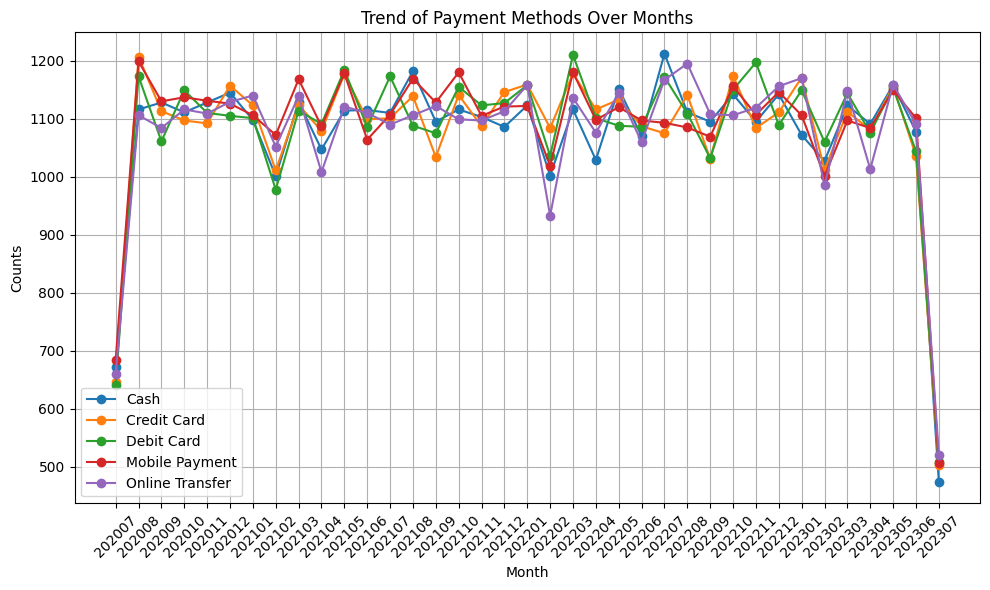

In [79]:
import matplotlib.pyplot as plt

# Assuming df_new2 is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
payment_methods = df_new2['PaymentMethod'].unique()

# Iterate over each unique payment method
for method in payment_methods:
    method_data = df_new2[df_new2['PaymentMethod'] == method]
    method_data['month']=method_data['month'].apply(str)
    # Plot the data points for the current payment method, using markers for better visibility
    plt.plot(method_data['month'], method_data['counts'], marker='o', label=method)  # Using markers for better visibility

# Set labels for the x and y axes, and title for the plot
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Trend of Payment Methods Over Months')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)  # Add grid for better readability
plt.show()


The code snippet utilizes the Matplotlib library in Python to generate a line plot illustrating the trends of different payment methods over consecutive months. This visualization provides a clear depiction of the trends in payment methods, allowing stakeholders to identify patterns and make informed decisions regarding payment processing strategies. Payment methods are consistent across all 33 months.

**Question 6:**
Which Month have highest sales based on the purchase Date.

In [80]:
# Group by month and sum up monthly sales
monthly_sales = df.groupby('month')['ProductPrice'].sum()

# Find the month with the highest sales
highest_sales_month = monthly_sales.idxmax()

# Separate year and month
highest_sales_year = highest_sales_month // 100
highest_sales_month = highest_sales_month % 100

# print the results
print("Month with the highest sales:")
print("Year:", highest_sales_year)
print("Month:", highest_sales_month)

Month with the highest sales:
Year: 2020
Month: 8


The code chunk identifies the month with the highest sales based on the purchase amount in the retail dataset.

Calculate monthly sales: Grouping by Month and Summing Up Monthly Sales. Within each group, the 'ProductPrice' column, represents the purchase amount and is summed up to calculate the total sales for each month.

Find the Month with the Highest Sales:
The idxmax() function is used to find the index (month) with the highest total sales from the grouped data. The given index corresponds to the month with the highest sales.

Separate Year and Month:
The month with the highest sales is split into its year and month to provide readable output.
    
Output:
The code prints the year and month representing the period with the highest sales in the DataFrame.

**Question 7:** Graph the Marketing Expenditure for each location. 

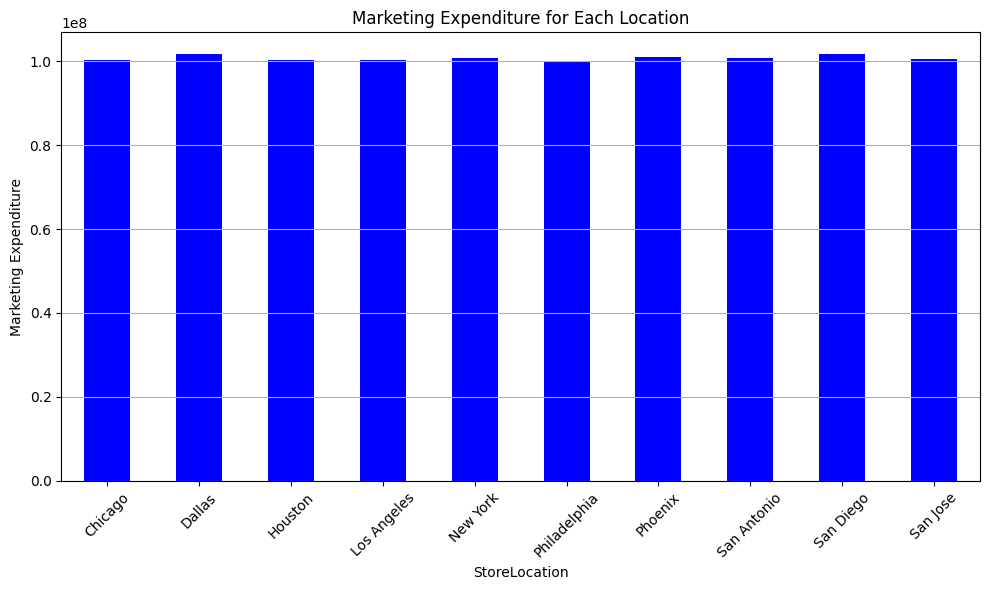

In [81]:
plt.figure(figsize=(10, 6)) # figure size

# Group by location and sum marketing expenditure
location_expenditure = df.groupby('StoreLocation')['MarketingExpenditure'].sum()

# Plot the marketing expenditure for each location
location_expenditure.plot(kind='bar', color='blue')

plt.xlabel('StoreLocation')
plt.ylabel('Marketing Expenditure')
plt.title('Marketing Expenditure for Each Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.grid(axis='y')  
plt.show()

All the cities have almost similar Marketing Expenditures.

Question 8: Identify the store with the highest foot traffic in each location over three year data

In [82]:
# Grouping by 'StoreLocation', 'StoreID', and 'PurchaseDate' to calculate the mean foot traffic per day for each store
df_ag = df.groupby(['StoreLocation', 'StoreID', 'PurchaseDate'])['FootTraffic'].mean().reset_index()

# Grouping by 'StoreLocation' and 'StoreID' to calculate the total foot traffic for each store
df_ag2 = df_ag.groupby(['StoreLocation', 'StoreID'])['FootTraffic'].sum().reset_index()

# Assigning ranks to stores within each location based on total foot traffic
df_ag2['rank'] = df_ag2.groupby(['StoreLocation'])['FootTraffic'].rank('dense', ascending=False)

# Selecting stores with the highest foot traffic rank (rank == 1) in each location
df_max_foot_traffic_per_location = df_ag2[df_ag2['rank'] == 1]

df_max_foot_traffic_per_location

,StoreLocation,StoreID,FootTraffic,rank
10,Chicago,11.0,112824.000000,1.0
179,Dallas,80.0,116261.833333,1.0
281,Houston,82.0,116028.000000,1.0
358,Los Angeles,59.0,121468.500000,1.0
436,New York,37.0,116983.666667,1.0
501,Philadelphia,2.0,120112.500000,1.0
686,Phoenix,87.0,113114.166667,1.0
791,San Antonio,92.0,110840.833333,1.0
880,San Diego,81.0,115755.500000,1.0
969,San Jose,70.0,116089.833333,1.0


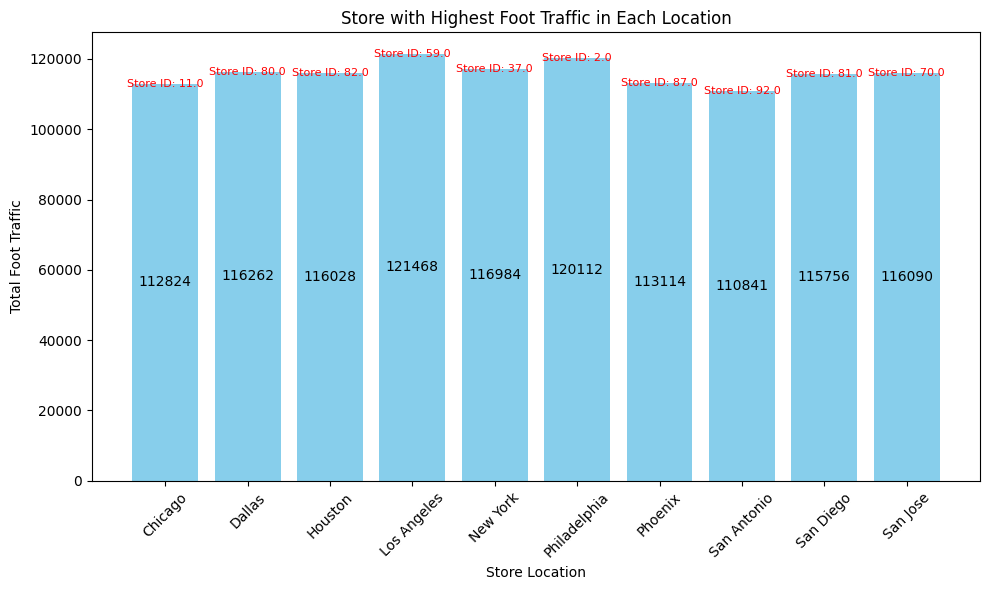

In [83]:

# Plotting the results
plt.figure(figsize=(10, 6))
bars = plt.bar(df_max_foot_traffic_per_location['StoreLocation'], df_max_foot_traffic_per_location['FootTraffic'], color='skyblue')
plt.xlabel('Store Location')
plt.ylabel('Total Foot Traffic')
plt.title('Store with Highest Foot Traffic in Each Location')
plt.xticks(rotation=45)

# Adding text labels for foot traffic numbers and corresponding store IDs on each bar
for bar, store_id, foot_traffic in zip(bars, df_max_foot_traffic_per_location['StoreID'], df_max_foot_traffic_per_location['FootTraffic']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{height:.0f}', ha='center', va='center')
    plt.text(bar.get_x() + bar.get_width()/2, height, f'Store ID: {store_id}', ha='center', va='center', color='red', fontsize=8)

plt.tight_layout()
plt.show()


This analysis sheds light on the stores with the highest foot traffic in various locations

By leveraging insights from stores with the highest foot traffic in each location, businesses can formulate effective strategies to capitalize on foot traffic opportunities, optimize operations, and enhance overall performance. Regular monitoring of foot traffic trends and customer behavior is essential for staying competitive and maximizing business potential across diverse urban landscapes.

**Question 9:**
What is average Price for given category, store id and Location. What is the competitors average price for the same category and location?

Note: This code needs use input

In [84]:
df['ProductPrice'][df["StoreID"] == 1.0][df["StoreLocation"] == 'Chicago'][df["ProductCategory"] == 'Groceries'].mean()

538.6444716838563

In [85]:
def compare_price(store_id, location, dataset, category):
    # Calculate the average price of the product in our store for the specified store ID, location, and category
    StorePrice = df['ProductPrice'][df["StoreID"] == store_id][df["StoreLocation"] == location][df["ProductCategory"] == category].mean()
    
    # Calculate the average price of the product in competitor stores for the specified store ID, location, and category
    CompPrice = df['CompetitorPrice'][df["StoreID"] == store_id][df["StoreLocation"] == location][df["ProductCategory"] == category].mean()
    
    # Return the average price in our store and the average competitor price
    return StorePrice, CompPrice

In [86]:
# Input 
# Set a flag to True to start the loop
flag = True

# Extract unique values for StoreID, StoreLocation, and ProductCategory from the DataFrame
set_store_id = set(df['StoreID'])
set_location = set(df['StoreLocation'])
set_category = set(df['ProductCategory']) 

# Start a while loop that will continue until the flag is False
while(flag == True):
    # Display a message for the user to enter inputs
    print('Price Comparison with the Competitor')
    
    # Ask the user to input the store ID, store location, and product category
    store_id = int(input('Enter the StoreID (Available values from 1 to 100): '))
    location = input('Enter the Store Location \n(Available Values: '
                     'Dallas,\nChicago,\nSan Jose,\nLos Angeles,\nPhiladelphia,\nSan Antonio,\nSan Diego'
                     '\nPhoenix,\nHouston,\nNew York): ')
    category = input('Enter the Product Category\n(Available Values: '
                    'Health & Beauty,\nGroceries,\nElectronics,\nBooks,\nHome & Kitchen,\nClothing): ')
   
    # Check if the input values are valid (store ID, location, and category)
    if store_id in set_store_id and location in set_location and category in set_category:
        # Call the compare_price function to get the store price and competitor price
        StorePrice, CompPrice = compare_price(store_id, location, df, category)
        
        # Set the flag to False to exit the loop
        flag = False
    else:
        # If the input values are not valid, display an error message and continue the loop
        print('Please enter valid Inputs')
        continue

# Output
# Display the average price for the product category in the specified location for both our store and competitor store
print(f'Our Store average Price for {category} in {location} is: {StorePrice:.2f}')
print(f'Competitor Store average Price for {category} in {location} is: {CompPrice:.2f}')

Price Comparison with the Competitor


Enter the StoreID (Available values from 1 to 100):  1
Enter the Store Location 
(Available Values: Dallas,
Chicago,
San Jose,
Los Angeles,
Philadelphia,
San Antonio,
San Diego
Phoenix,
Houston,
New York):  Dallas
Enter the Product Category
(Available Values: Health & Beauty,
Groceries,
Electronics,
Books,
Home & Kitchen,
Clothing):  Groceries


Our Store average Price for Groceries in Dallas is: 522.88
Competitor Store average Price for Groceries in Dallas is: 526.02


The above Analysis provides the average store price and the average competitor's price for particular categories in stores from particular locations. This approach can help to compare the store price with competitors' prices.

**Question 10:**
Plot the graph to show the avergae product price vs average Competitors price for all the product categories for given store id and location.

Note: This code needs use input

Enter the StoreID(Avaiable values from 1 to 100): 1
Enter the Store Location 
(Available Values: Dallas,
Chicago,
San Jose,
Los Angeles,
Philadelphia,
San Antonio,
San Diego
Phoenix,
Houston,
New York): Dallas


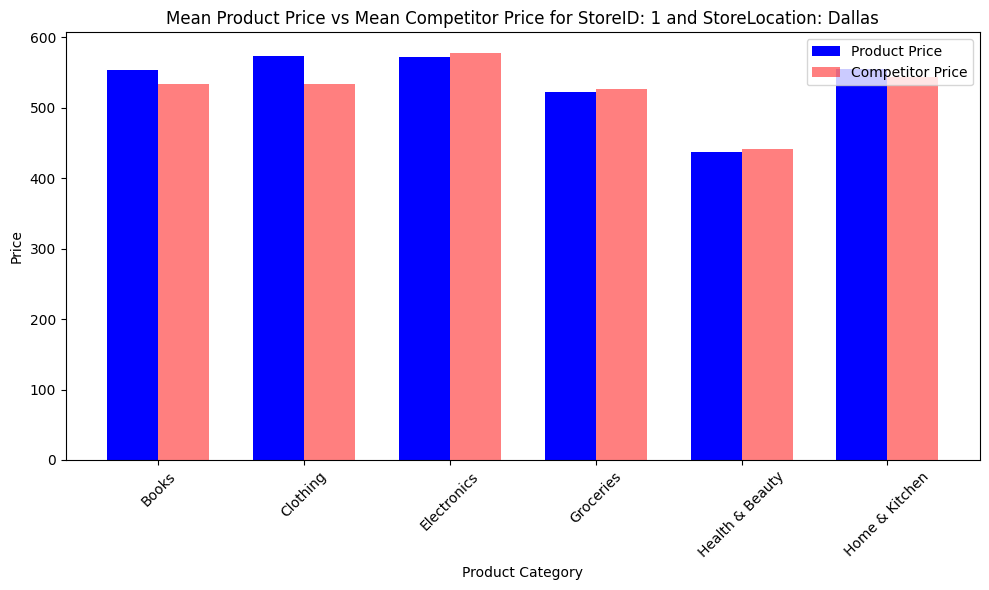

In [87]:
def plotPriceComparison(store, location_name):
    # filtering dataframe
    filtered_df = df[(df['StoreLocation'] == location_name) & (df['StoreID'] == store)]
    filtered_df
     
    # Extracting only 'ProductCategory', 'ProductPrice', and 'CompetitorPrice' columns
    extracted_df = filtered_df[['ProductCategory', 'ProductPrice', 'CompetitorPrice']]
     
    # Group by ProductCategory and calculate mean for ProductPrice and CompetitorPrice
    grouped_df = extracted_df.groupby('ProductCategory').mean().reset_index()
     
    # Get the number of categories
    num_categories = len(grouped_df)
     
    # Define the width of each bar
    bar_width = 0.35
     
    # Define the x positions for the bars
    index = range(num_categories)
     
    # Plot bar graph of ProductPrice vs CompetitorPrice
    plt.figure(figsize=(10, 6))
    plt.bar(index, grouped_df['ProductPrice'], color='blue', width=bar_width, label='Store Product Price')
    plt.bar([i + bar_width for i in index], grouped_df['CompetitorPrice'], color='red', width=bar_width, alpha=0.5, label='Competitor Price')
    plt.xlabel('Product Category')
    plt.ylabel('Price')
    plt.title(f'Mean Product Price vs Mean Competitor Price for StoreID: {store} and StoreLocation: {location_name}')
    plt.xticks([i + bar_width / 2 for i in index], grouped_df['ProductCategory'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return

while (True):
    # Ask the user to input the store ID, store location
    storeid = int(input('Enter the StoreID(Avaiable values from 1 to 100):'))
    location_name = input('Enter the Store Location \n(Available Values: '
                     'Dallas,\nChicago,\nSan Jose,\nLos Angeles,\nPhiladelphia,\nSan Antonio,\nSan Diego'
                    '\nPhoenix,\nHouston,\nNew York):') 
    if storeid in set_store_id and location_name in set_location:
        break
    else:
        continue

plotPriceComparison(storeid, location_name)


Above plot provides dynamic price comparison  based on user input for store ID and location name, helping visualize how product prices compare with competitor prices for a specific store and location.

**References:**
<br>1. https://www.kaggle.com/datasets/abdurraziq01/retail-data
<br>2. https://pandas.pydata.org/
<br>3. https://numpy.org/
<br>4. https://matplotlib.org/
<br>5. https://unt.instructure.com/courses/98622
<br>6. https://learn.zybooks.com/zybook/UNTBCIS5110SohaeeSpring2024/chapter/16/section/1